# **SALES PREDICTION USING PYTHON**

1. Loading the dataset

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('advertising.csv')

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
data.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


2. Data Visualization

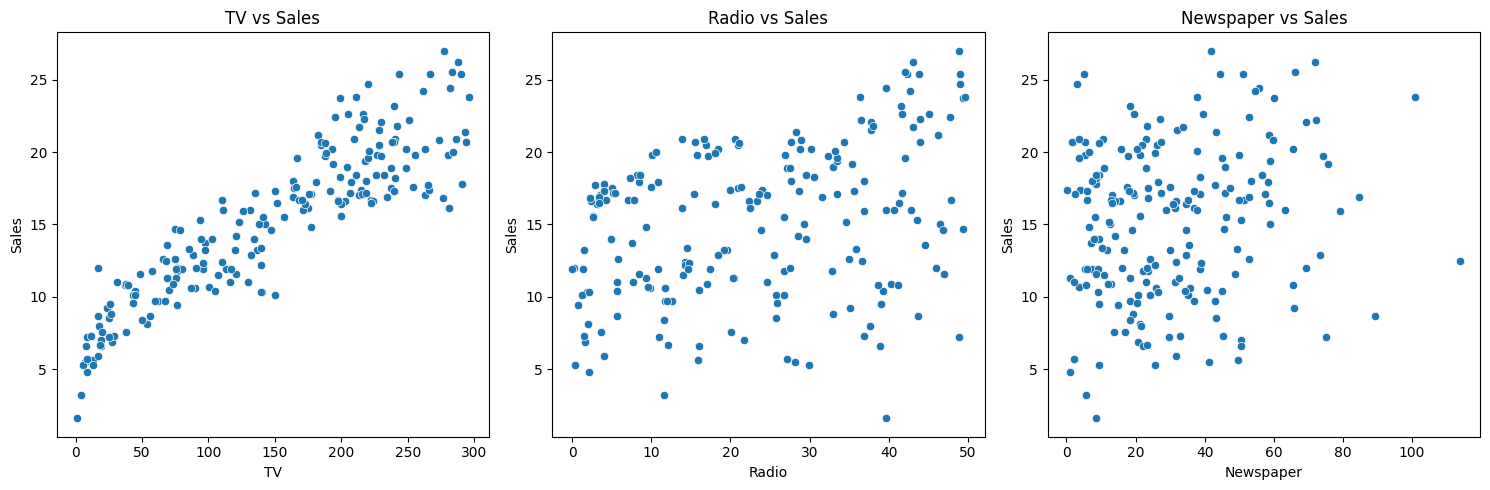

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for each feature vs Sales
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=data)
plt.title('TV vs Sales')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=data)
plt.title('Radio vs Sales')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=data)
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()


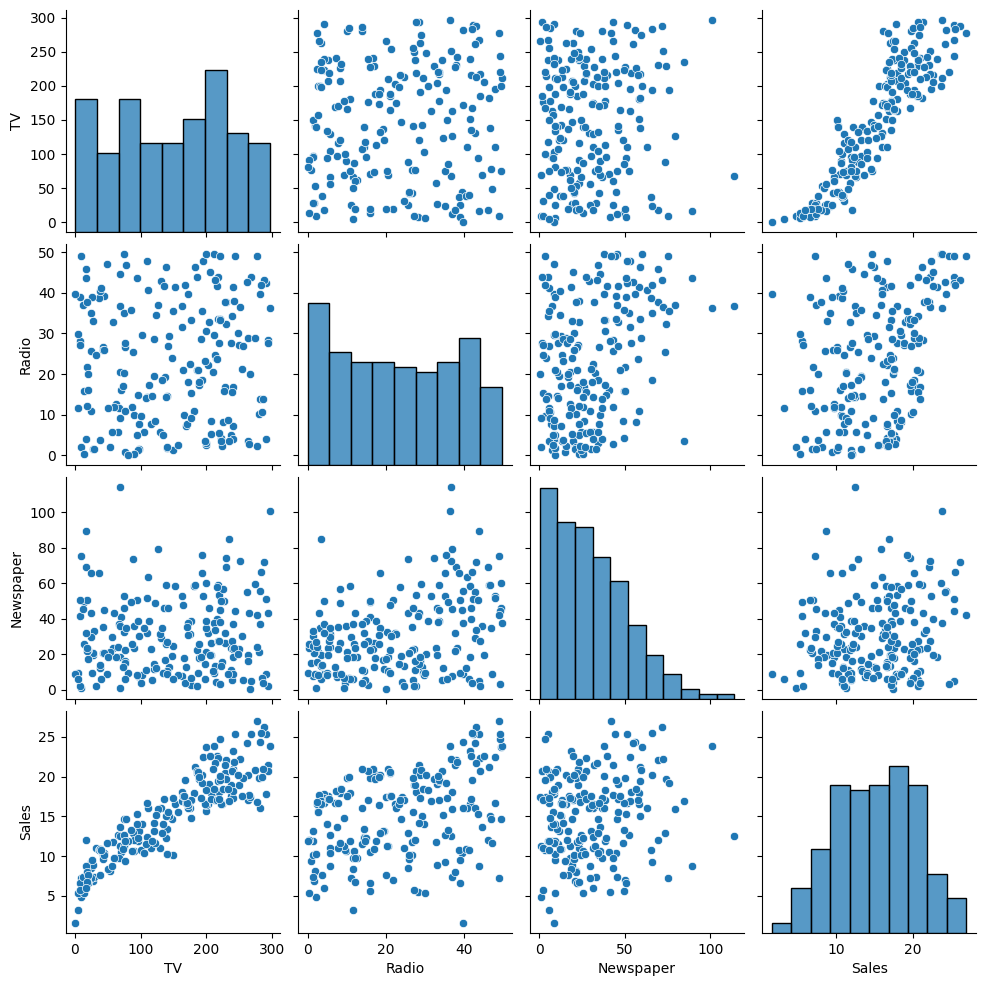

In [9]:
import seaborn as sns

# Pair plot
sns.pairplot(data)
plt.show()


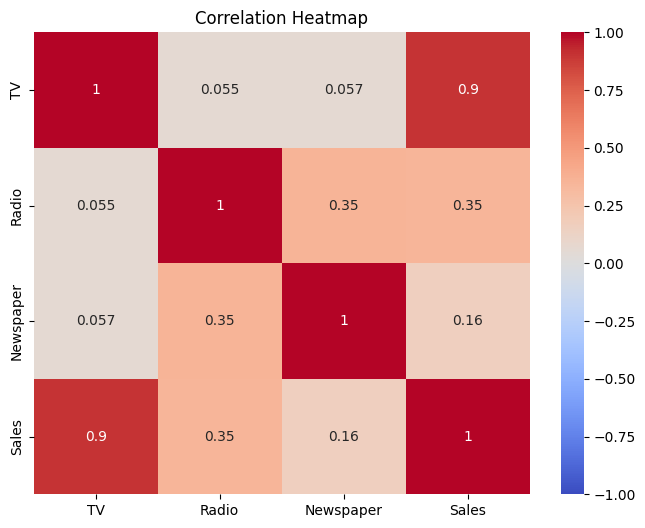

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


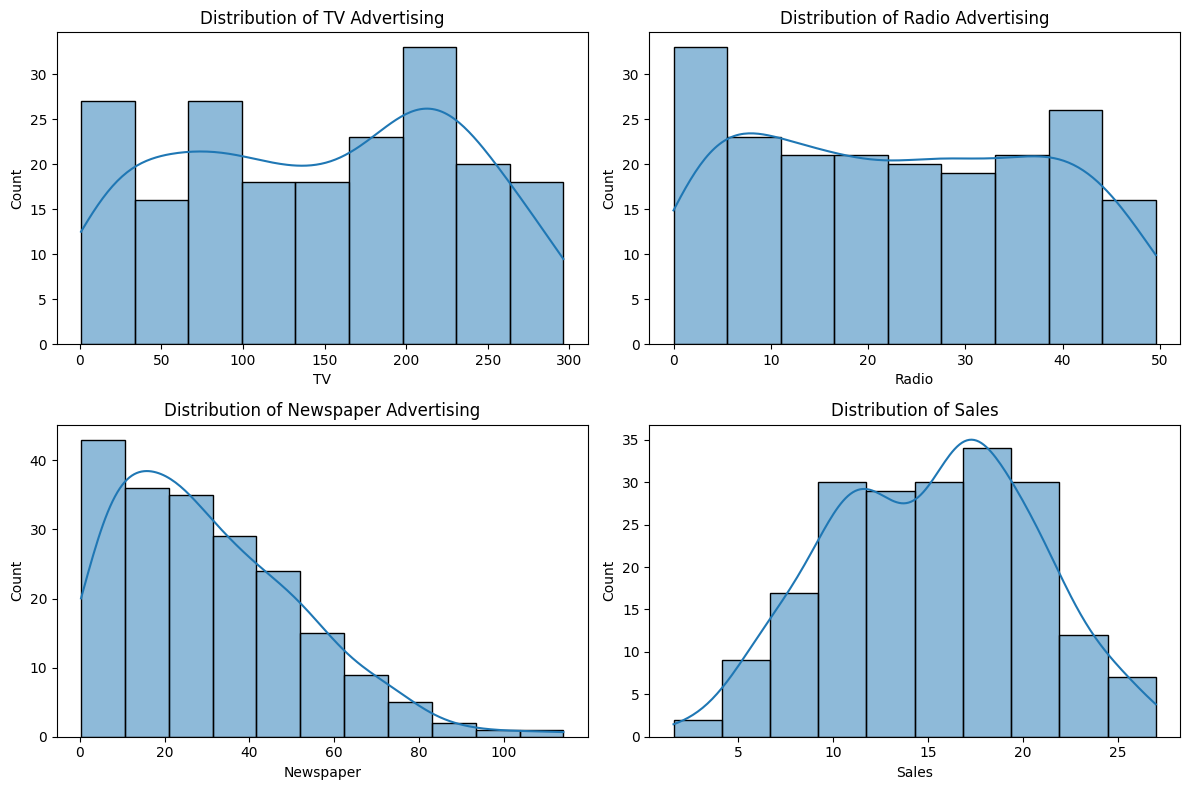

In [11]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(data['TV'], kde=True)
plt.title('Distribution of TV Advertising')

plt.subplot(2, 2, 2)
sns.histplot(data['Radio'], kde=True)
plt.title('Distribution of Radio Advertising')

plt.subplot(2, 2, 3)
sns.histplot(data['Newspaper'], kde=True)
plt.title('Distribution of Newspaper Advertising')

plt.subplot(2, 2, 4)
sns.histplot(data['Sales'], kde=True)
plt.title('Distribution of Sales')

plt.tight_layout()
plt.show()


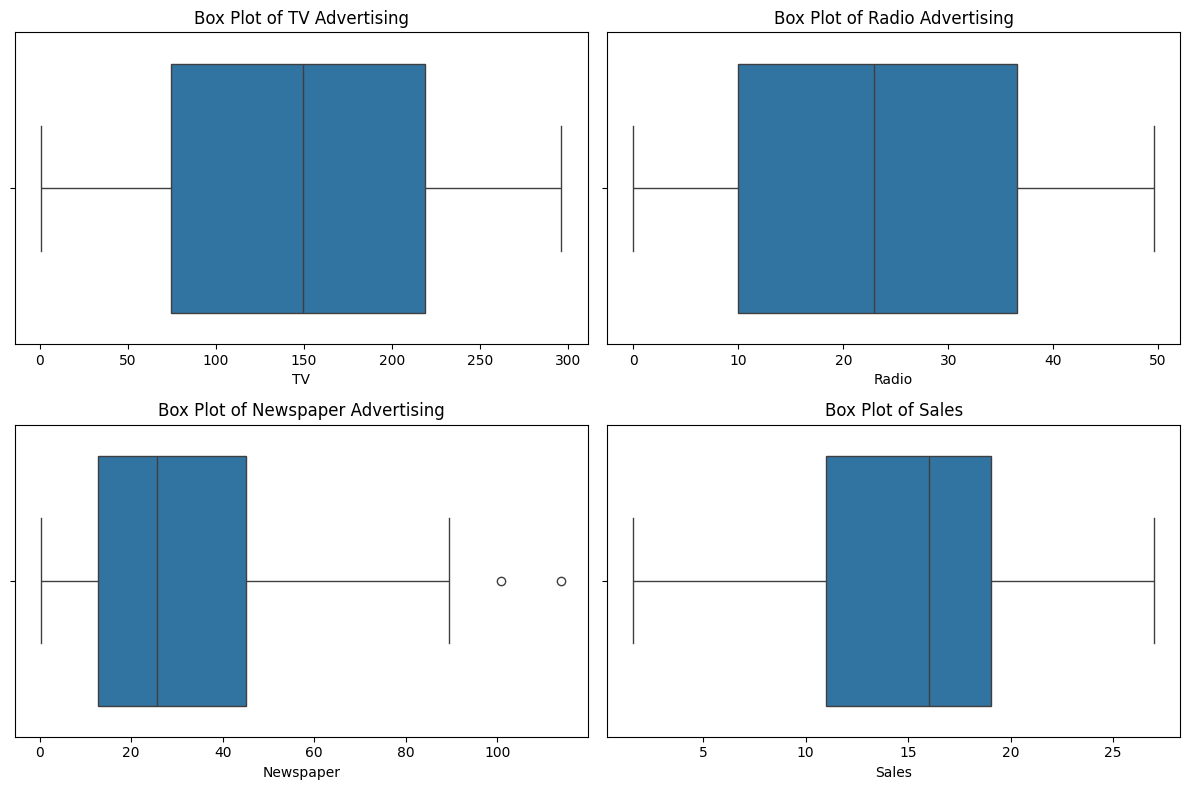

In [12]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=data['TV'])
plt.title('Box Plot of TV Advertising')

plt.subplot(2, 2, 2)
sns.boxplot(x=data['Radio'])
plt.title('Box Plot of Radio Advertising')

plt.subplot(2, 2, 3)
sns.boxplot(x=data['Newspaper'])
plt.title('Box Plot of Newspaper Advertising')

plt.subplot(2, 2, 4)
sns.boxplot(x=data['Sales'])
plt.title('Box Plot of Sales')

plt.tight_layout()
plt.show()


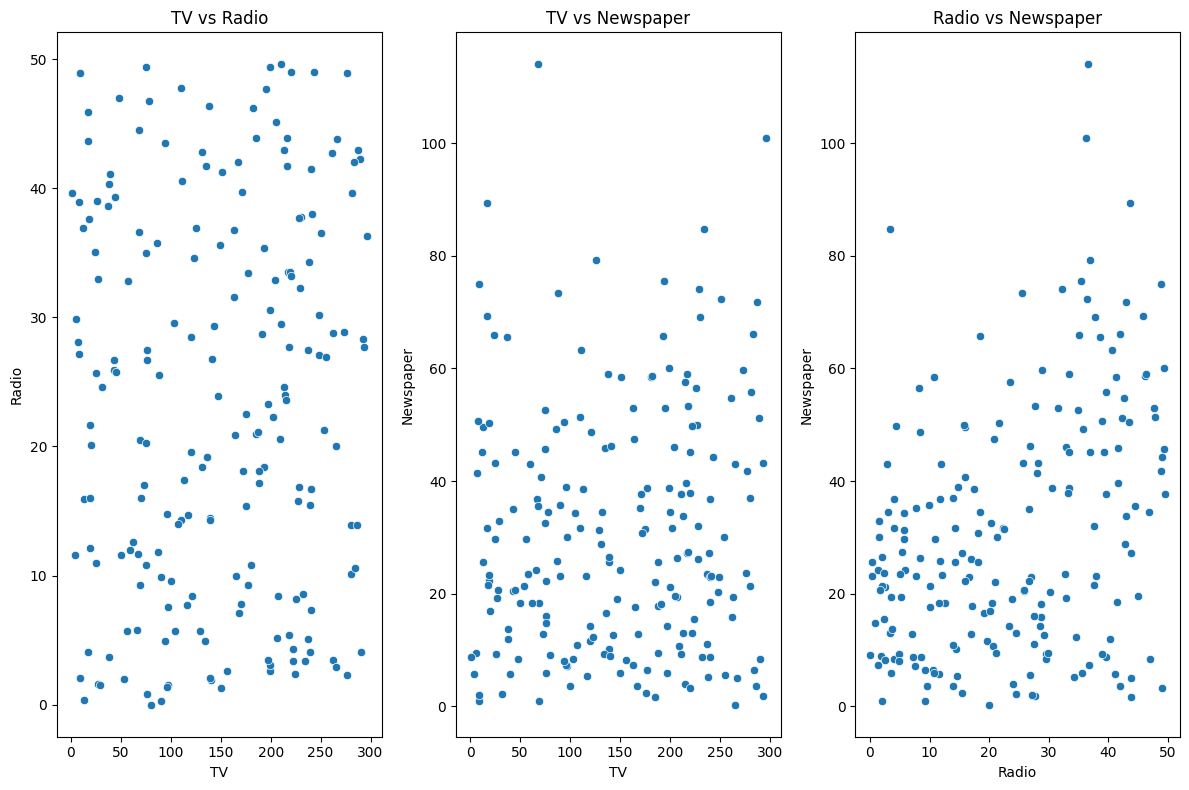

In [13]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Radio', data=data)
plt.title('TV vs Radio')

plt.subplot(1, 3, 2)
sns.scatterplot(x='TV', y='Newspaper', data=data)
plt.title('TV vs Newspaper')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Radio', y='Newspaper', data=data)
plt.title('Radio vs Newspaper')

plt.tight_layout()
plt.show()


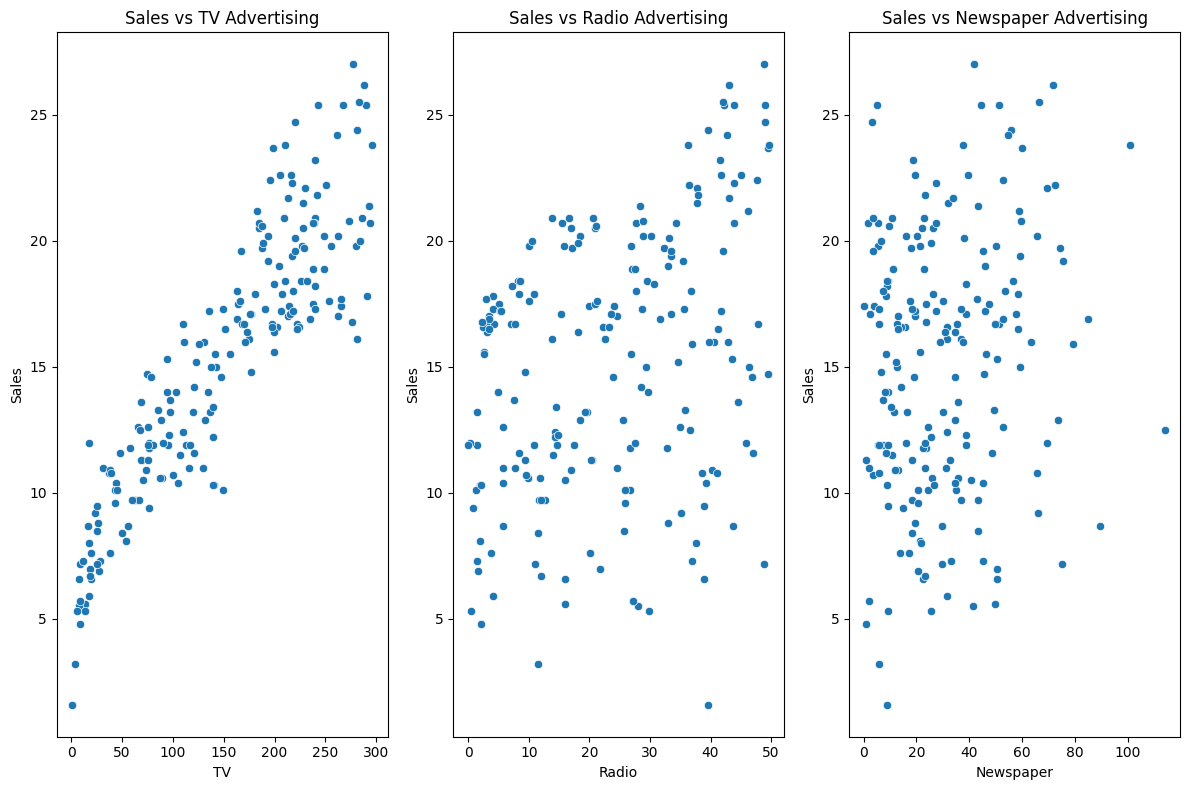

In [14]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=data)
plt.title('Sales vs TV Advertising')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=data)
plt.title('Sales vs Radio Advertising')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=data)
plt.title('Sales vs Newspaper Advertising')

plt.tight_layout()
plt.show()


3. Data Preprocessing

In [15]:
from sklearn.model_selection import train_test_split

# Features and target
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4. Training the model

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


In [17]:
# Coefficients and intercept
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')


Coefficients: [0.05450927 0.10094536 0.00433665]
Intercept: 4.714126402214127


5. Training on New Data

In [18]:
# Example new data
new_data = pd.DataFrame({
    'TV': [100, 150],
    'Radio': [20, 30],
    'Newspaper': [50, 60]
})

# Make predictions
predictions = model.predict(new_data)
print(predictions)


[12.40079307 16.17907671]


6. Visulalizing the Regression line

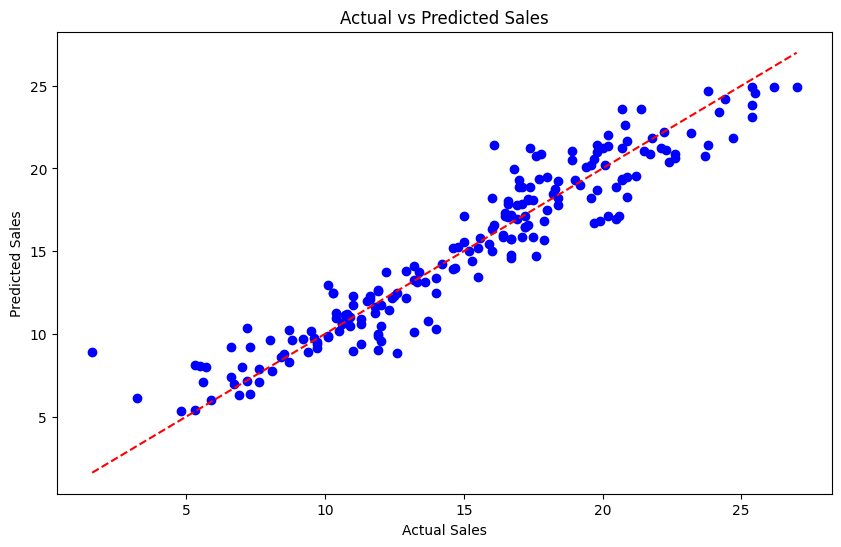

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


7. Visualizing Feature importance

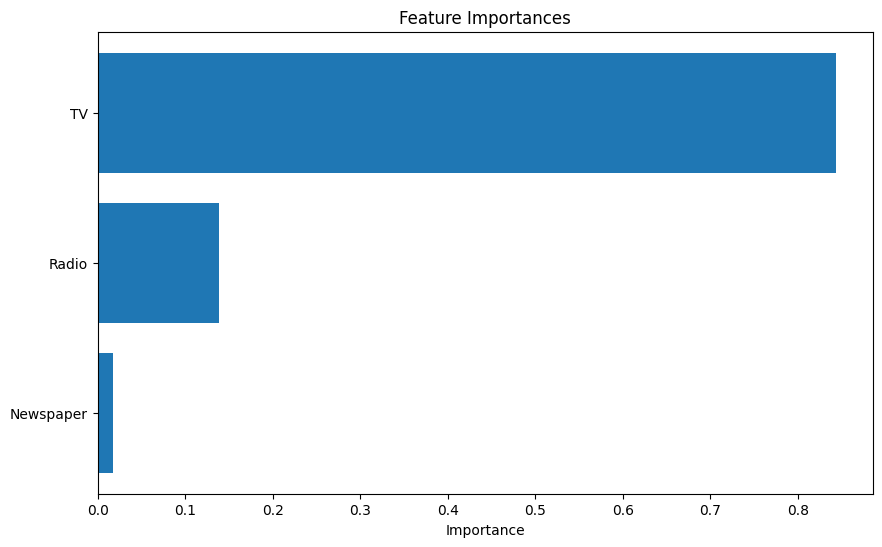

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Fit Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Plot feature importances
plt.figure(figsize=(10, 6))
importances = rf_model.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)
plt.barh(features[sorted_idx], importances[sorted_idx])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.show()
